**Queens data results**

In [36]:
#Importing modules and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime, timedelta
t = pd.read_excel(r"Matlab outputs.xlsx", sheet_name="Sheet1", index_col=None, header=None)
theatre_temperature = pd.read_excel(r"Matlab outputs.xlsx", sheet_name="Sheet2", index_col=None, header=None)
total_power = pd.read_excel(r"Matlab outputs.xlsx", sheet_name="Sheet3", index_col=None, header=None)
temp_post_fv = pd.read_excel(r"Matlab outputs.xlsx", sheet_name="Sheet4", index_col=None, header=None)
OAT = pd.read_excel(r"Matlab outputs.xlsx", sheet_name="Sheet5", index_col=None, header=None)
real_room_temp = pd.read_excel(r"Room temp.xlsx", sheet_name="Sheet1", index_col=None, header=None)
real_room_temp = real_room_temp.rename(columns={0: 'Time (hours)', 1: 'Temperature degC'})
temp_post_fv = temp_post_fv.rename(columns = {0: 'Temp post fv'})
OAT = OAT.rename(columns = {0: 'OAT'})
display(temp_post_fv)

,Temp post fv
0,18.492841
1,18.358668
2,18.218129
3,17.984461
4,17.679892
...,...
28056,18.841755
28057,18.845313
28058,18.848971
28059,18.852731


In [37]:
time_series = t[0].tolist()
time_series_np = np.array(time_series)
time_series_hours = np.divide(time_series_np, 3600)
time_series_new = []
for i in time_series:
    sec = str(timedelta(seconds=(int(i)+36000)))
    time_series_new.append(sec)
date_time = []
for i in time_series_new:
    i = '26/01/24, ' + i
    i = i.replace('26/01/24, 1 day','27/01/24')
    i = i.replace('26/01/24, 2 days','28/01/24')
    i = i.replace('26/01/24, 3 days','29/01/24')
    date_time.append(i)

In [38]:
date_time_df = pd.DataFrame(date_time)
date_time_df = date_time_df.merge(theatre_temperature, left_index= True, right_index= True)
date_time_df = date_time_df.merge(total_power, left_index= True, right_index= True)
date_time_df = date_time_df.merge(temp_post_fv, left_index= True, right_index= True)
date_time_df = date_time_df.merge(OAT, left_index= True, right_index= True)
date_time_df = date_time_df.rename(columns={'0_x': 'Date, Time', '0_y': 'Temperature degC', 0:'Total power'})
date_time_df['Time (hours)'] = time_series_hours[0:28061].tolist()
display(date_time_df)
date_time_df = date_time_df.groupby(['Date, Time']).mean()
print(date_time_df)


,"Date, Time",Temperature degC,Total power,Temp post fv,OAT,Time (hours)
0,"26/01/24, 10:00:00",18.500000,6.979132,18.492841,17.971315,0.000000e+00
1,"26/01/24, 10:00:00",18.500099,6.979139,18.358668,17.971315,9.798810e-18
2,"26/01/24, 10:00:00",18.500199,6.979145,18.218129,17.971315,1.959762e-17
3,"26/01/24, 10:00:00",18.500298,6.979156,17.984461,17.971315,3.520798e-17
4,"26/01/24, 10:00:00",18.500397,6.979169,17.679892,17.971315,5.496603e-17
...,...,...,...,...,...,...
28056,"29/01/24, 9:29:23",17.198430,6.777214,18.841755,15.101062,7.148983e+01
28057,"29/01/24, 9:29:33",17.198516,6.773038,18.845313,15.108581,7.149260e+01
28058,"29/01/24, 9:29:43",17.198603,6.769002,18.848971,15.116099,7.149538e+01
28059,"29/01/24, 9:29:53",17.198690,6.765106,18.852731,15.123617,7.149816e+01


                    Temperature degC  Total power  Temp post fv        OAT  \
Date, Time                                                                   
26/01/24, 10:00:00         18.518092     9.069755     15.165482  17.971259   
26/01/24, 10:00:01         18.536658     9.896031     23.912181  17.968020   
26/01/24, 10:00:02         18.537452    10.004529     23.908914  17.965830   
26/01/24, 10:00:03         18.538079    10.083554     23.905958  17.963758   
26/01/24, 10:00:04         18.538655    10.144588     23.903094  17.961666   
...                              ...          ...           ...        ...   
29/01/24, 9:29:23          17.198430     6.777214     18.841755  15.101062   
29/01/24, 9:29:33          17.198516     6.773038     18.845313  15.108581   
29/01/24, 9:29:43          17.198603     6.769002     18.848971  15.116099   
29/01/24, 9:29:53          17.198690     6.765106     18.852731  15.123617   
29/01/24, 9:30:00          17.198777     6.762603     18.855280 

**Operating schedule:**<br>
10am-6pm (8 hours): 0 to 8<br>
6pm-8am (14 hours): 8 to 22 (Offline)<br>
8am-6pm (10 hours): 22 to 32<br>
6pm-8am (14 houra): 32 to 46 (Offline)<br>
8am-6pm (10 hours): 46 to 56<br>
6pm-8am (14 hours): 56 to 70 (Offline)<br>
8am-9:30am (1.5hours): 70 to 71.5<br>

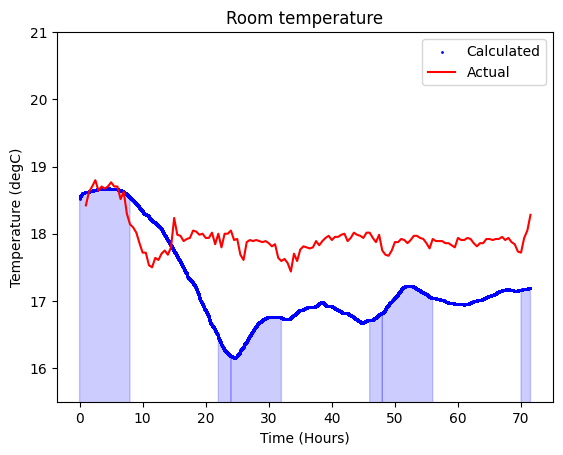

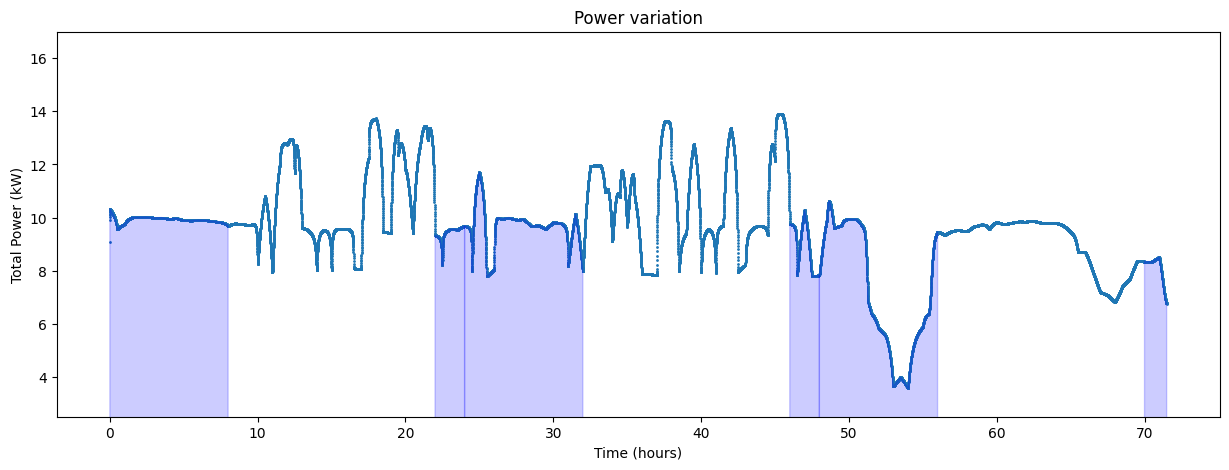

In [39]:
range = date_time_df["Time (hours)"]

plt.scatter(date_time_df["Time (hours)"],date_time_df["Temperature degC"], c='b', s= 1)
plt.plot(real_room_temp["Time (hours)"],real_room_temp["Temperature degC"],c='r')
plt.fill_between(
        x= date_time_df["Time (hours)"], 
        y1= date_time_df["Temperature degC"], 
        where= (range<=8)|((22<=range)&(range<32))|((46<=range)&(range<=56))|((70<=range)&(range<=71.5)),
        color= "b",
        alpha= 0.2)
plt.ylim((15.5,21))
plt.title("Room temperature")
plt.xlabel("Time (Hours)")
plt.ylabel("Temperature (degC)")
plt.legend(["Calculated","Actual"])
plt.show()
date_time_df.plot(x="Time (hours)", y="Total power",
        kind="scatter", s= 1, figsize=(15, 5))
plt.title("Power variation")
plt.ylabel("Total Power (kW)")
plt.fill_between(
        x= date_time_df["Time (hours)"], 
        y1= date_time_df["Total power"], 
        where= (range<8)|((22<range)&(range<32))|((46<range)&(range<56))|((70<range)&(range<71.5)),
        color= "b",
        alpha= 0.2)
plt.ylim((2.5,17))
plt.show()
date_time_df.to_excel("Python outputs.xlsx", sheet_name='Sheet1')  
